In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

In [2]:
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dt = {}
for column in df.columns:
    count = len(df[column].unique())
    dt[column] = [count]

pd.DataFrame(dt).transpose()

,0
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [4]:
len(df['caa'].unique())

5

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
tar_col = ['output']
cat_col = ['sex','cp','fbs','restecg','slp','thall','exng','caa']
con_col = [col for col in df.columns if col not in cat_col and col not in tar_col ]


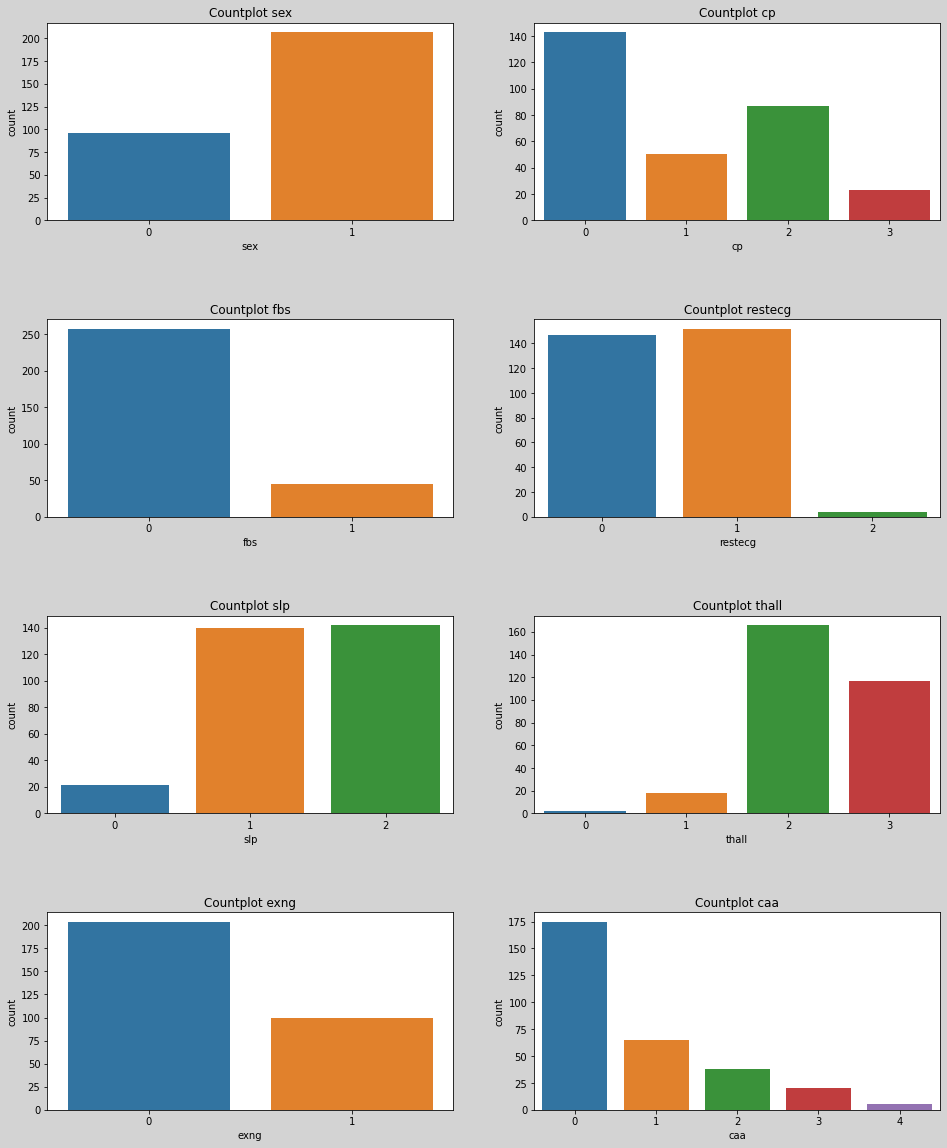

In [10]:
fig, axs = plt.subplots(4,2,figsize=(16, 20))
boxplot_colors = ['steelblue', 'salmon', 'limegreen', 'gold', 'orchid']
plot_index = [[0,0],[0,1],[1,0],[1,1],[2,0],[2,1],[3,0],[3,1]]
n_cols=2
n_rows=4
fig.patch.set_facecolor('lightgray')

for i,(col,axes) in enumerate(zip(cat_col,axs.flat)):
    counts = df[col].value_counts()
    sns.countplot(data=df,x=df[col],ax=axes)
    axes.set_title('Countplot {}'.format(col))
    
plt.subplots_adjust(hspace=0.5)
#axs.flat[-1].set_visible(False)
#plt.suptitle('Outlier detection')    
plt.show()

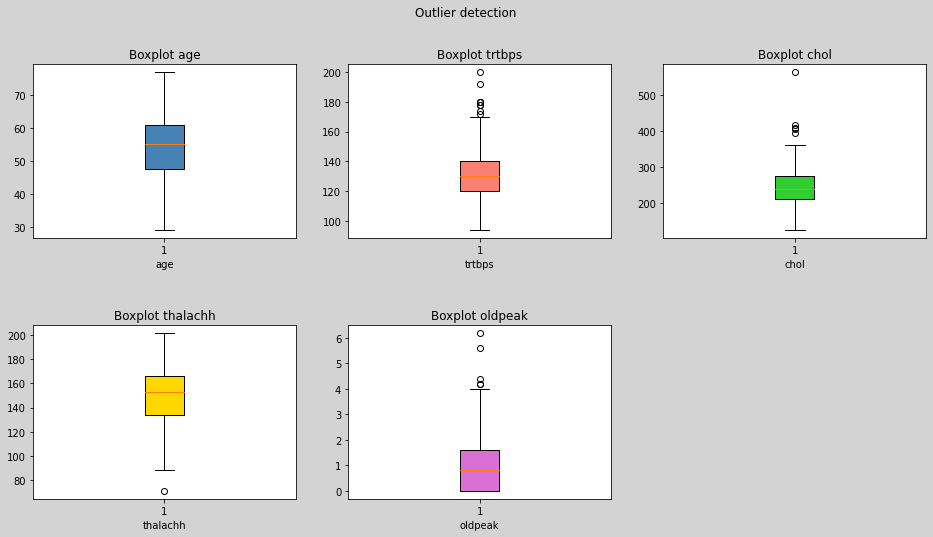

In [11]:
fig, axs = plt.subplots(2,3,figsize=(16, 8))
boxplot_colors = ['steelblue', 'salmon', 'limegreen', 'gold', 'orchid']

fig.patch.set_facecolor('lightgray')

for i,(col,ax,color) in enumerate(zip(con_col,axs.flat,boxplot_colors)):
    ax.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor=color))
    ax.set_xlabel(col)
    ax.set_title('Boxplot {}'.format(col))
    
plt.subplots_adjust(hspace=0.5)
axs.flat[-1].set_visible(False)
plt.suptitle('Outlier detection')    
plt.show()

In [12]:
def cal_robust_stats(data,lower_percetile=25,upper_percentile=75):
    median = np.median(data)
    lower_quartile = np.percentile(data,lower_percetile)
    upper_quartile = np.percentile(data,upper_percentile)
    iqr = upper_quartile-lower_quartile
    v_col = data[(data <= lower_quartile - 1.5 * iqr) | (data >= upper_quartile + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    return v_col, perc

In [13]:
for column_name,data in df[con_col].items():
    v_col, perc = cal_robust_stats(data)
    print(f"Column {column_name} outlier = {len(v_col)} => {round(perc,3)}%")

Column age outlier = 0 => 0.0%
Column trtbps outlier = 13 => 4.29%
Column chol outlier = 5 => 1.65%
Column thalachh outlier = 1 => 0.33%
Column oldpeak outlier = 8 => 2.64%


In [14]:
def winsorize(data, lower_percentile=0.05, upper_percentile=0.95):
    lower_limit = np.percentile(data, lower_percentile)
    upper_limit = np.percentile(data, upper_percentile)
    winsorized_data = np.clip(data, lower_limit, upper_limit)
    return winsorized_data

In [15]:
for column_name,data in df[con_col].items():
    data = winsorize(data,5,95)
    df[column_name] = data
    v_col, perc = cal_robust_stats(data)
    print(f"Column {column_name} outlier = {len(v_col)} => {round(perc,3)}%")

Column age outlier = 0 => 0.0%
Column trtbps outlier = 0 => 0.0%
Column chol outlier = 0 => 0.0%
Column thalachh outlier = 0 => 0.0%
Column oldpeak outlier = 0 => 0.0%


In [16]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df1 = df.copy()
X = df1.drop(columns=['output'])
y = df1['output']



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
sm = SMOTE(sampling_strategy='minority',random_state=7)

X_train, y_train = sm.fit_resample(X_train,y_train)

In [17]:
preprocessor = ColumnTransformer([
            ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), cat_col)
        ], remainder='passthrough')

processed_X_train = preprocessor.fit_transform(X_train)
processed_X_test = preprocessor.transform(X_test)

In [ ]:
preprocessor = ColumnTransformer([
    ()
])

In [18]:
X_train.shape

(264, 13)

In [19]:
X_test.shape

(61, 13)

In [20]:
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(processed_X_train)
X_test = scaler1.transform(processed_X_test)

In [21]:
X_train.shape

(264, 30)

In [22]:
X_test.shape

(61, 30)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score

from sklearn.metrics import accuracy_score,classification_report

In [24]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'XGBClassifier': XGBClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

k = 5

kfold = KFold(n_splits=k, shuffle=True, random_state=42)

for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores = cross_val_score(model, X, y, cv=kfold)
    print(f"-----------------------------------{model_name}----------------------------------------")
    print(f"accuracy {accuracy_score(y_test,y_pred)}\n")
    print(f'Mean cross val score {scores.mean()}')
    print(classification_report(y_test,y_pred))
    

-----------------------------------LogisticRegression----------------------------------------
accuracy 0.8688524590163934

Mean cross val score 0.8249180327868852
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

-----------------------------------SVC----------------------------------------
accuracy 0.819672131147541

Mean cross val score 0.6762295081967213
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

-----------------------------------R

In [25]:
from sklearn.model_selection import GridSearchCV

logistic_regression_params = {
    'penalty': ['l2'],
    'C': [0.01, 0.1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear','saga'],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': [1000,1400],
    'warm_start': [True, False]
}

random_forest_params = {
    'n_estimators': [300,500],
    'max_depth': [None,10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [4,5]
}

gradient_boosting_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [5,6],
    'subsample': [0.6,0.8],
    'max_features': ['sqrt', 'log2']
}

xgboost_params = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.01],
    'max_depth': [4, 5],
    'subsample': [0.6,0.8],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

param_grid = [
    (LogisticRegression(), logistic_regression_params),
    (RandomForestClassifier(), random_forest_params),
    (GradientBoostingClassifier(), gradient_boosting_params),
    (XGBClassifier(), xgboost_params),
    (KNeighborsClassifier(), knn_params)
]

param_dict = {}

for model, params in param_grid:
    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train, y_train)
    param_dict[ model.__class__.__name__] = grid_search.best_params_
    print("Best parameters for", model.__class__.__name__, ":")
    print(grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print()

Best parameters for LogisticRegression :
{'C': 0.01, 'class_weight': None, 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': True}
Best score: 0.8484760522496371

Best parameters for RandomForestClassifier :
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.8486937590711177

Best parameters for GradientBoostingClassifier :
{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.863788098693759

Best parameters for XGBClassifier :
{'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.8601596516690856

Best parameters for KNeighborsClassifier :
{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best score: 0.8486937590711175



In [26]:
for model_name, param in param_dict.items():
    model = models[model_name]
    model.set_params(**param)
    model.fit(X_train,y_train)
    X_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    #scores = cross_val_score(model, X, y, cv=kfold)
    print(f"-----------------------------------{model_name}----------------------------------------")
    print(f"train accuracy score {accuracy_score(y_train,X_pred)}\n")
    print(f"test accuracy score {accuracy_score(y_test,y_pred)}\n")
    #print(f'Mean cross val score {scores.mean()}')
    print(param)
    print(classification_report(y_test,y_pred))

-----------------------------------LogisticRegression----------------------------------------
train accuracy score 0.8484848484848485

test accuracy score 0.8688524590163934

{'C': 0.01, 'class_weight': None, 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': True}
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

-----------------------------------RandomForestClassifier----------------------------------------
train accuracy score 0.9204545454545454

test accuracy score 0.8360655737704918

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.80      0.86      0.8